#Cluster Aglomerativo, Kmeans, Arboles

Universidad Nacional Autónoma de México

Facultad de Estudios Superiores Acatlán

Licenciatura en Ciencia de Datos

Rosales Herrera Jonathan Adrian

3-1724328-6

27/09/2023

---

##Objetivo

El objetivo consistió en aplicar y comparar diferentes técnicas de clustering en un conjunto de datos no etiquetado. Se llevaron a cabo tres experimentos utilizando los algoritmos K-Nearest Neighbors (KNN), Random Forest y Clustering Aglomerativo para analizar la capacidad de estos métodos en la formación de grupos coherentes de datos. Se buscó comprender cómo cada algoritmo se desempeña en la tarea de clustering y evaluar la calidad de los clústeres resultantes. El objetivo final fue adquirir una comprensión profunda de las técnicas de clustering y su aplicabilidad en la segmentación de datos en contextos del mundo real.

##Materiales y métodos

*   Conjunto de datos *AnunciosRedesSociales.csv*
*   Herramientas de Programación (Google Colaboratory)

##Resumen
El objetivo principal es aplicar y comparar tres técnicas de clustering: K-Nearest Neighbors (KNN), Random Forest y Clustering Aglomerativo, en un conjunto de datos no etiquetado. Se llevaron a cabo tres experimentos para evaluar la capacidad de estos algoritmos en la formación de grupos coherentes de datos. El estudio se centró en comprender cómo cada algoritmo se desempeña en la tarea de clustering y en analizar la calidad de los clústeres resultantes. Se proporcionó una comprensión profunda de las técnicas de clustering y su utilidad en la segmentación de datos en aplicaciones del mundo real.

##Antecedentes Teóricos

El clustering, o agrupamiento, es una técnica fundamental en el análisis de datos que se utiliza para identificar patrones y estructuras ocultas en conjuntos de datos no etiquetados. En el contexto de este experimento, se exploraron dos algoritmos ampliamente conocidos:

1. **K-Nearest Neighbors (KNN)**: KNN es un algoritmo de aprendizaje automático supervisado que también se utiliza en tareas de clustering. Se basa en la premisa de que puntos de datos similares tienden a estar en la misma región del espacio de características. KNN asigna un punto de datos a la clase que prevalece entre sus k vecinos más cercanos, donde k es un parámetro seleccionado previamente.

2. **Random Forest**: Random Forest es un algoritmo de aprendizaje automático que combina múltiples árboles de decisión para tomar decisiones más robustas y precisas. En el contexto de clustering, se puede utilizar para identificar grupos de datos similares al evaluar la proximidad entre los puntos en el espacio de características.

3. **Clustering Aglomerativo**: Este enfoque es una técnica de clustering jerárquico que comienza considerando cada punto de datos como un clúster individual y luego fusiona iterativamente los clústeres más cercanos hasta formar un único clúster o un número predeterminado de clústeres. Es una técnica útil para analizar la estructura jerárquica de los datos.

Comprender estos antecedentes teóricos es esencial para seleccionar y aplicar adecuadamente los algoritmos de clustering en función de la naturaleza de los datos y los objetivos del análisis. Cada uno de estos enfoques tiene sus propias características y consideraciones, lo que permite su aplicación en diferentes escenarios de análisis de datos.

##Desarrollo

### Agglomerative Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
X = df.iloc[:,[3,4]].values

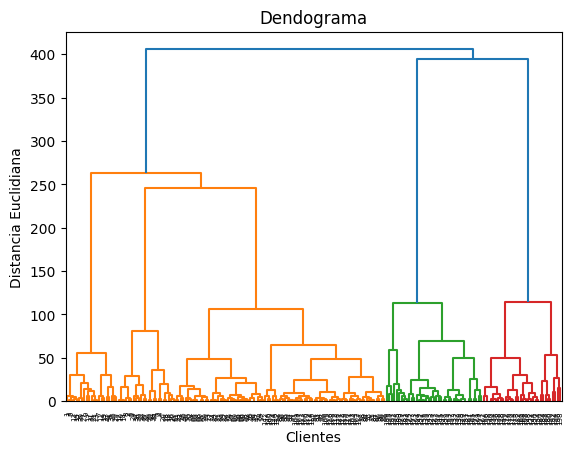

In [ ]:
dendograma = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [ ]:
cJerarquico = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_cJerarquico = cJerarquico.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


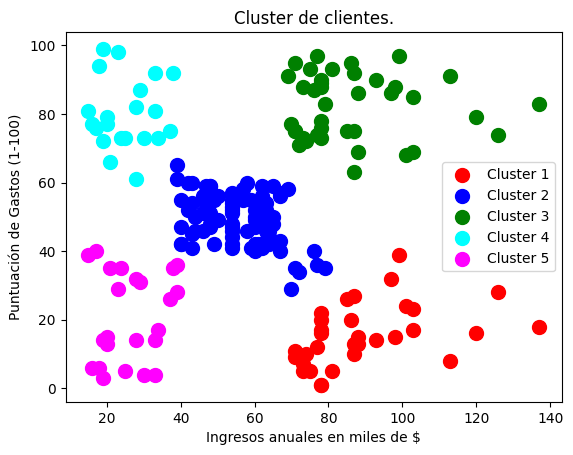

In [ ]:
plt.scatter(X[y_cJerarquico==0,0], X[y_cJerarquico==0,1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_cJerarquico==1,0], X[y_cJerarquico==1,1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_cJerarquico==2,0], X[y_cJerarquico==2,1], s=100, c="green", label="Cluster 3")
plt.scatter(X[y_cJerarquico==3,0], X[y_cJerarquico==3,1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X[y_cJerarquico==4,0], X[y_cJerarquico==4,1], s=100, c="magenta", label="Cluster 5")

plt.title("Cluster de clientes.")
plt.xlabel("Ingresos anuales en miles de $")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()

###KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
X = df.iloc[:,[3,4]].values

In [ ]:
cuadrados = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init = 10, random_state=0)
  kmeans.fit(X)
  cuadrados.append(kmeans.inertia_)

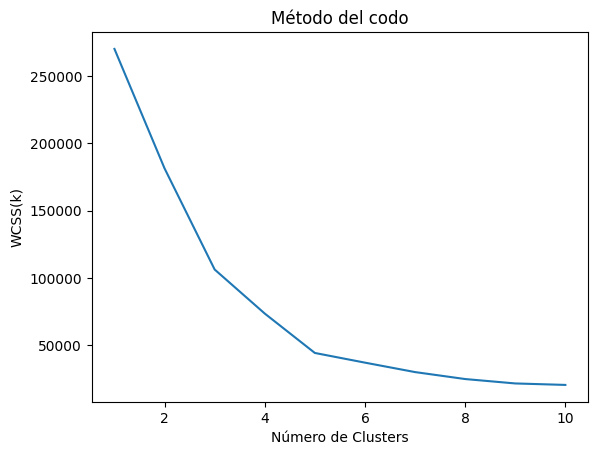

In [ ]:
plt.plot(range(1,11), cuadrados)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means = kmeans.fit_predict(X)

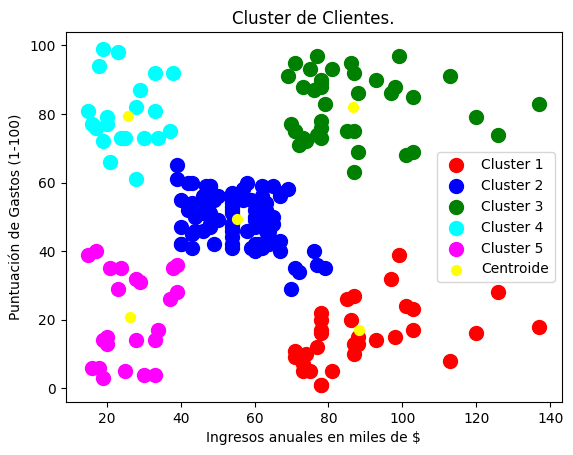

In [ ]:
plt.scatter(X[y_cJerarquico==0,0], X[y_cJerarquico==0,1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_cJerarquico==1,0], X[y_cJerarquico==1,1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_cJerarquico==2,0], X[y_cJerarquico==2,1], s=100, c="green", label="Cluster 3")
plt.scatter(X[y_cJerarquico==3,0], X[y_cJerarquico==3,1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X[y_cJerarquico==4,0], X[y_cJerarquico==4,1], s=100, c="magenta", label="Cluster 5")

centro = kmeans.cluster_centers_
plt.scatter(centro[:,0],centro[:,1],s=50, c="yellow", label="Centroide")
plt.title("Cluster de Clientes.")
plt.xlabel("Ingresos anuales en miles de $")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()

###Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
df = pd.read_csv('/content/AnunciosRedesSociales.csv')

In [ ]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,4]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [ ]:
scalerX = StandardScaler()
x_train = scalerX.fit_transform(x_train)
x_test = scalerX.fit_transform(x_test)

In [ ]:
ranfor = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
ranfor.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = ranfor.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 5, 27]])

<ipython-input-44-95940fd7254c>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


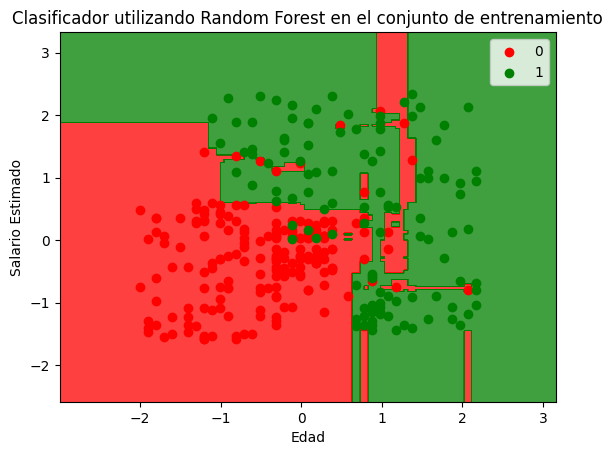

In [ ]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                     np.arange(start= X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,ranfor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
              c= ListedColormap(('red', 'green'))(i), label=j)

plt.title('Clasificador utilizando Random Forest en el conjunto de entrenamiento')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

<ipython-input-47-445b61e7222a>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


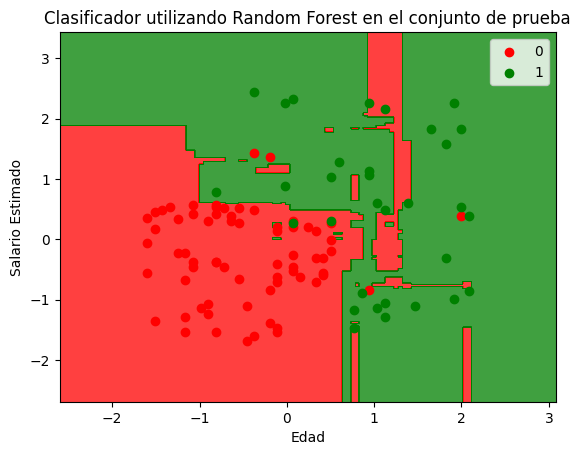

In [ ]:
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                     np.arange(start= X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,ranfor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
              c= ListedColormap(('red', 'green'))(i), label=j)

plt.title('Clasificador utilizando Random Forest en el conjunto de prueba')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

##Conclusiones
Se han proporcionado valiosas conclusiones sobre las técnicas de clustering aplicadas. En primer lugar, K-Nearest Neighbors (KNN) demostró ser eficaz para formar grupos coherentes en datos no etiquetados, aunque la elección del número óptimo de vecinos (k) es crucial. Random Forest, por su parte, se destacó por su versatilidad y capacidad para abordar diversas situaciones de clustering, junto con la utilidad de evaluar la importancia de las variables predictoras. Además, el enfoque de Clustering Aglomerativo permitió explorar la estructura jerárquica de los datos. La conclusión clave es que la elección del algoritmo de clustering debe basarse en el contexto y los objetivos específicos de la tarea, aprovechando las fortalezas de cada enfoque para obtener resultados óptimos en el análisis de datos no etiquetados.

##Referencias



*   Pandey, P. (2020) Agglomerative Clustering. Machine Learnign Geek. https://machinelearninggeek.com/agglomerative-clustering/
*   DataScientist. (2022). Descubra el algoritmo KNN https://datascientest.com/es/que-es-el-algoritmo-knn
*   IBM. (2021). ¿Qué es el random forest? https://www.ibm.com/mx-es/topics/random-forest

